In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
from google.colab import files
uploaded = files.upload()

Saving Datos históricos de Vista Oil Gas (VIST).csv to Datos históricos de Vista Oil Gas (VIST) (1).csv


In [42]:
df = pd.read_csv('Datos históricos de Vista Oil Gas (VIST).csv')

In [43]:
df

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,06.02.2026,"55,940","54,775","55,990","54,702","791,71K","3,32%"
1,05.02.2026,"54,140","55,720","56,390","53,790","1,98M","-4,75%"
2,04.02.2026,"56,840","56,430","57,290","55,370","2,15M","1,50%"
3,03.02.2026,"56,000","56,225","56,300","54,965","6,55M","-7,02%"
4,02.02.2026,"60,230","60,050","62,420","59,066","1,68M","-0,43%"
...,...,...,...,...,...,...,...
1528,08.01.2020,"7,930","7,910","8,050","7,700","72,33K","-0,88%"
1529,07.01.2020,"8,000","8,070","8,190","7,780","149,54K","-0,99%"
1530,06.01.2020,"8,080","8,220","8,340","8,050","43,59K","-1,46%"
1531,03.01.2020,"8,200","8,120","8,320","8,120","83,86K","1,86%"


**Limpieza**

---



In [44]:
#elimino apertura, maximo,minimo
df.drop('Apertura', axis=1, inplace=True)
df.drop('Máximo', axis=1, inplace=True)
df.drop('Mínimo', axis=1, inplace=True)


In [45]:
#paso a formato fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)

In [46]:
#verifico  si tiene nulos
df.isna().sum()

,0
Fecha,0
Último,0
Vol.,0
% var.,0


In [47]:
#paso a float la columna var%
df['% var.'] = df['% var.'].str.replace('%', '', regex=False).str.replace(',','.',regex=False).astype(float)

In [48]:
#funcion para formatear  numros de la columna vol(volumen)
def convertir_vol(x):
    x = str(x).strip()
    x = x.replace(',', '.')   # pasar coma a punto

    if x.endswith('M'):
        return float(x[:-1]) * 1_000_000
    elif x.endswith('K'):
        return float(x[:-1]) * 1_000
    elif x == '-' or x == '':
        return None
    else:
        return float(x)

In [49]:
#convierto la columna vol(volumen)
df['Vol.'] = df['Vol.'].apply(convertir_vol)

In [50]:
#paso a float la columna ultimo
df['Último']=df['Último'].str.replace(',','.',regex=False).astype(float)


In [51]:
#renombro la columna ultimo a precio
df.rename(columns={'Último':'Precio'},inplace=True)

**Analisis**

---



**¿Cómo se movió el precio de la acción de VIST ?**


---






In [52]:
#filtro  por  fecha
filtro_por_año = df[df['Fecha'] >= "2024-11-20"]


In [53]:
#precio maximo
filtro_por_año['Precio'].max()

60.59

In [54]:
#precio minimo
filtro_por_año['Precio'].min()

33.7

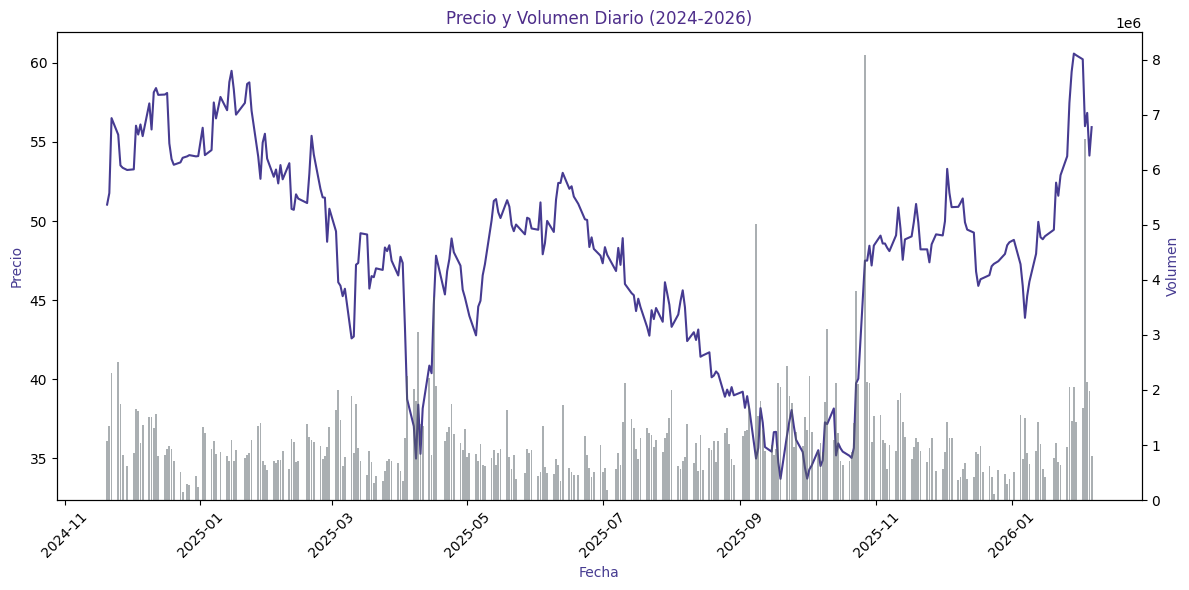

In [55]:
#grafico
fix, ax1 = plt.subplots(figsize=(12, 6 ))

#precio
ax1.plot(filtro_por_año['Fecha'], filtro_por_año['Precio'], color='#463B91',  label='Precio')

ax1.set_xlabel('Fecha', color='#463B91')
ax1.set_ylabel('Precio', color='#463B91')
ax1.tick_params(axis='y', labelcolor='black')

#volumen
ax2 = ax1.twinx()
ax2.bar(filtro_por_año['Fecha'], filtro_por_año['Vol.'], color='#576066', alpha=0.5, label='Volumen')
ax2.set_ylabel('Volumen', color='#463B91')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Precio y Volumen Diario (2024-2026)', color='#4D2D8A')

ax1.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

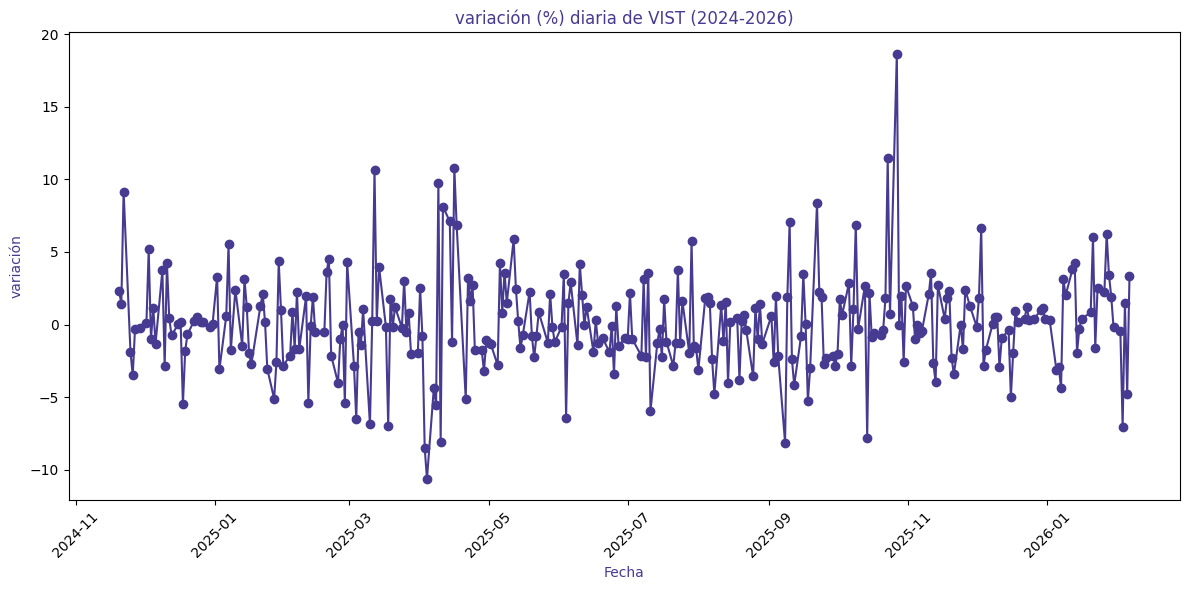

In [56]:
#grafico
fig, ax= plt.subplots(figsize=(12, 6))

ax.plot(filtro_por_año['Fecha'], filtro_por_año['% var.'],  marker='o', color= '#463B91')
ax.set_title('variación (%) diaria de VIST (2024-2026)',  color= '#463B91')
ax.set_xlabel('Fecha', color= '#463B91')
ax.set_ylabel('variación', color= '#463B91')

ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

In [57]:
#variacion minima
filtro_por_año['% var.'].min()

-10.62

In [58]:
#variacion maxima
filtro_por_año['% var.'].max()

18.66

In [59]:
#
#
#

**uso df_corr_filtro para hacer un scatter y ver la Relación visual entre Precio y Volumen**

---



**filtro fecha

---





In [60]:
#filtro
df_Corr_filtro = df[df['Fecha'] >= "2023-11-11"]

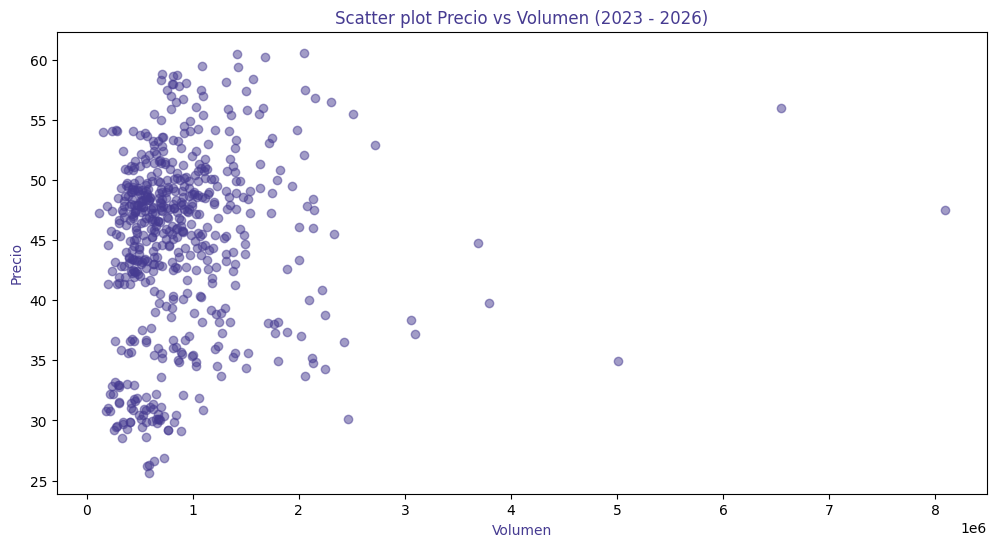

In [61]:
#grafico

plt.figure(figsize=(12, 6))

plt.scatter(df_Corr_filtro['Vol.'], df_Corr_filtro['Precio'], alpha= 0.5,  color= '#463B91')
plt.title('Scatter plot Precio vs Volumen (2023 - 2026)', color= '#463B91')
plt.xlabel('Volumen', color= '#463B91')
plt.ylabel('Precio', color= '#463B91')
plt.show()

In [62]:
#grafico Interactivo
import plotly.express as px



fig = px.scatter(df_Corr_filtro, x='Vol.', y='Precio',
                 hover_data=['Fecha'],
                 title='VIST - Precio vs Volumen (pasá el mouse!)',
                 width=1000, height=600)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.show()

In [63]:
#
#
#








**El heatmap de rendimiento mensual**



---









In [64]:
# Creo columnas año y mes

df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month

In [65]:
# Agrupo por Año y Mes, obtenemos promedio de la variacion mensual
var_mensual = df.groupby(['Año', 'Mes'])['% var.'].mean().reset_index()


In [66]:
# Pivot
Heatmap_data = var_mensual.pivot(index='Año', columns='Mes', values='% var.')




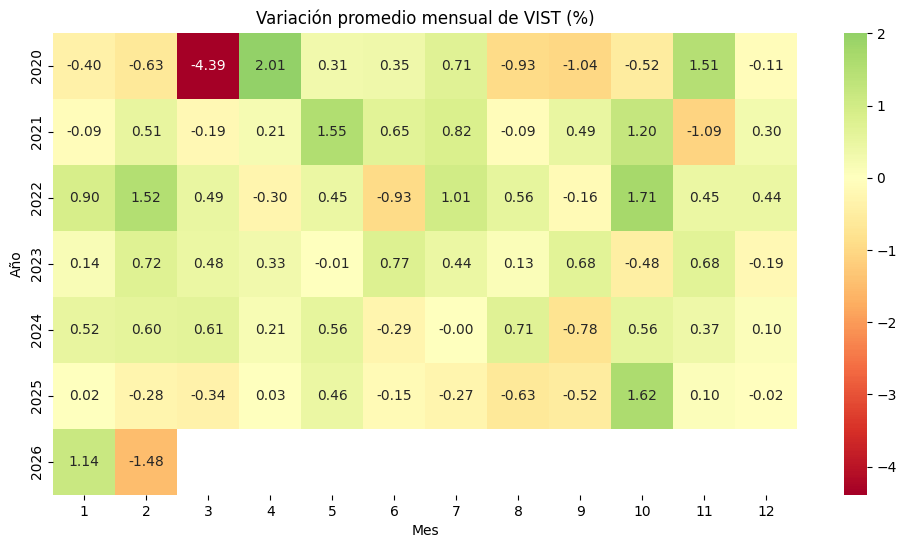

In [67]:
#grafico


plt.figure(figsize=(12,6))

sns.heatmap(Heatmap_data, annot=True, fmt=".2f", cmap="RdYlGn", center=0)
plt.title("Variación promedio mensual de VIST (%)")
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()


In [68]:
#
#
#

** % de Retorno anual **

---






In [69]:
# Ordeno por fecha
df= df.sort_values('Fecha')

Retorno = df.groupby(df['Fecha'].dt.year)['Precio'].agg(['first', 'last'])


Retorno = Retorno.rename(columns= { 'first': 'Precio_apertura_año',
    'last': 'Precio_cierre_año'})

#Calculo retorno anual %
Retorno['retorno_anual_%'] = (Retorno['Precio_cierre_año'] / Retorno['Precio_apertura_año'] - 1) * 100




In [70]:
año_retorno = Retorno.index
porcentajes = Retorno['retorno_anual_%']

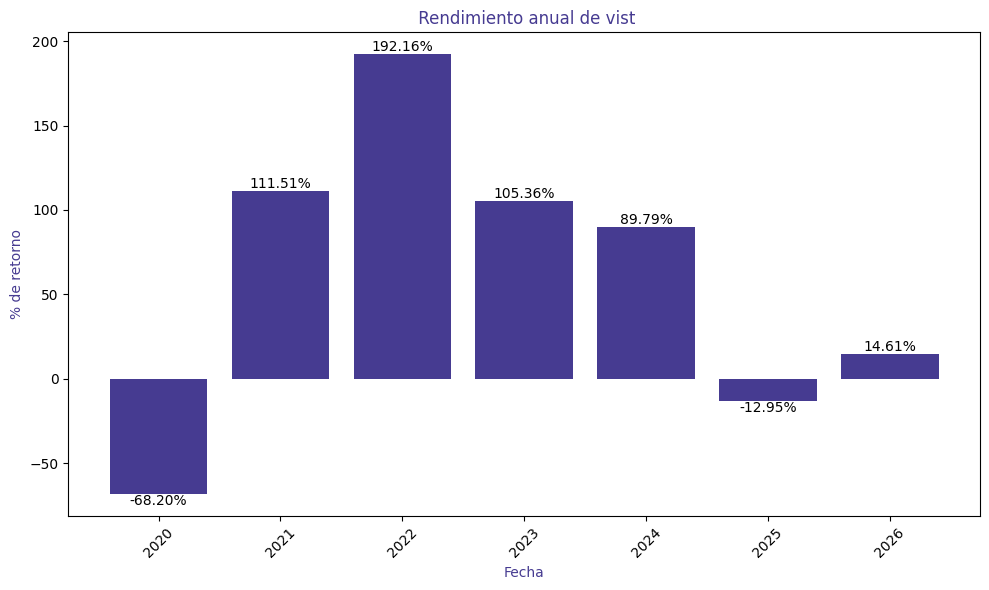

In [71]:
#grafico

fix, ax = plt.subplots(figsize=(10, 6))

bar = ax.bar(año_retorno, porcentajes,  color= '#463B91')
ax.set_title(' Rendimiento anual de vist',color= '#463B91')
ax.set_xlabel('Fecha', color= '#463B91')
ax.set_ylabel('% de retorno', color= '#463B91')

ax.tick_params(axis='x', labelrotation=45)

ax.bar_label(bar, labels=[f"{v:.2f}%" for v in porcentajes])

plt.tight_layout()

plt.show()